In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import the csv file 

In [2]:
dataframe = pd.read_csv("../data/stock_details_5_years.csv")
print(dataframe.head())

                        Date        Open        High         Low       Close  \
0  2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   43.083508   
1  2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595  104.636131   
2  2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   54.729000   
3  2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   83.678497   
4  2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   39.037853   

      Volume  Dividends  Stock Splits Company  
0  167080000       0.00           0.0    AAPL  
1   28123200       0.00           0.0    MSFT  
2   31004000       0.00           0.0   GOOGL  
3  132264000       0.00           0.0    AMZN  
4   54917200       0.04           0.0    NVDA  


Data Cleaning:
1.check what type of columns are present
2.check for any missing values in data
3.display the basic info
4.If some columns need to ne cleaned:
A.remove rows with missing values
B.fill missing values with appropriate methods:
i.forward fill
ii.fill with 0

In [3]:
print(dataframe.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')


In [11]:
#Check for missing values
print(dataframe.isnull().sum())

# Display basic info
dataframe.info()

# Check the first few rows
print(dataframe.head())

# Remove rows with missing values (if any)
dataframe = dataframe.dropna()

#dataframe = dataframe.fillna(method='ffill')  # forward fill
dataframe = dataframe.fillna(0)  # fill with 0

Open       0
High       0
Low        0
Close      0
Volume     0
Company    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Open     602962 non-null  float64
 1   High     602962 non-null  float64
 2   Low      602962 non-null  float64
 3   Close    602962 non-null  float64
 4   Volume   602962 non-null  int64  
 5   Company  602962 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 27.6+ MB
         Open        High         Low       Close     Volume Company
0   43.829761   43.863354   42.639594   43.083508  167080000    AAPL
1  104.769074  105.519257  103.534595  104.636131   28123200    MSFT
2   54.176498   55.007500   54.099998   54.729000   31004000   GOOGL
3   83.749496   84.499496   82.616501   83.678497  132264000    AMZN
4   39.692784   40.064904   38.735195   39.037853   54917200    NVDA


convert Date column to Date format:
(not required here)
check if date is already the index
display the rows


In [14]:
print(dataframe.columns)

# Check if Date is already the index
print(dataframe.index.name)

# Display first few rows
print(dataframe.head())



Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Company'], dtype='object')
None
         Open        High         Low       Close     Volume Company
0   43.829761   43.863354   42.639594   43.083508  167080000    AAPL
1  104.769074  105.519257  103.534595  104.636131   28123200    MSFT
2   54.176498   55.007500   54.099998   54.729000   31004000   GOOGL
3   83.749496   84.499496   82.616501   83.678497  132264000    AMZN
4   39.692784   40.064904   38.735195   39.037853   54917200    NVDA


Keep only the columns required

In [6]:
dataframe = dataframe[['Open', 'High', 'Low', 'Close', 'Volume', 'Company']]
print(dataframe.head())
dataframe.info()

         Open        High         Low       Close     Volume Company
0   43.829761   43.863354   42.639594   43.083508  167080000    AAPL
1  104.769074  105.519257  103.534595  104.636131   28123200    MSFT
2   54.176498   55.007500   54.099998   54.729000   31004000   GOOGL
3   83.749496   84.499496   82.616501   83.678497  132264000    AMZN
4   39.692784   40.064904   38.735195   39.037853   54917200    NVDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Open     602962 non-null  float64
 1   High     602962 non-null  float64
 2   Low      602962 non-null  float64
 3   Close    602962 non-null  float64
 4   Volume   602962 non-null  int64  
 5   Company  602962 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 27.6+ MB


EDA:
added import warnings
warnings.filterwarnings('ignore') to suppress warning messages to keep the output clean


add some style for better visualisation of plots
husl provides distinct colours for plots

In [15]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Printing basic info about dataset size
len(dataframe) to count total rows in dataset
.nunique to count unique company names

In [16]:
print("Starting EDA Analysis")
print(f"Total rows in dataset: {len(dataframe)}")
print(f"Total companies: {dataframe['Company'].nunique()}")

Starting EDA Analysis
Total rows in dataset: 602962
Total companies: 491


Filtering the top 5 companies:

In [17]:
company_counts = dataframe['Company'].value_counts()
top_companies = company_counts.head(5).index.tolist()
print(f"\nAnalyzing top 5 companies: {top_companies}")

# Filter dataframe to only include top companies
df_filtered = dataframe[dataframe['Company'].isin(top_companies)].copy()
print(f"Filtered dataset size: {len(df_filtered)} rows")


Analyzing top 5 companies: ['LYV', 'CCJ', 'IFF', 'FITB', 'PPL']
Filtered dataset size: 6290 rows


1. Price trends section:
a.plotting the closing price for each company
b.compare overall growth
c.visualize the comparison in the growth of the companies


1. ANALYZING PRICE TRENDS


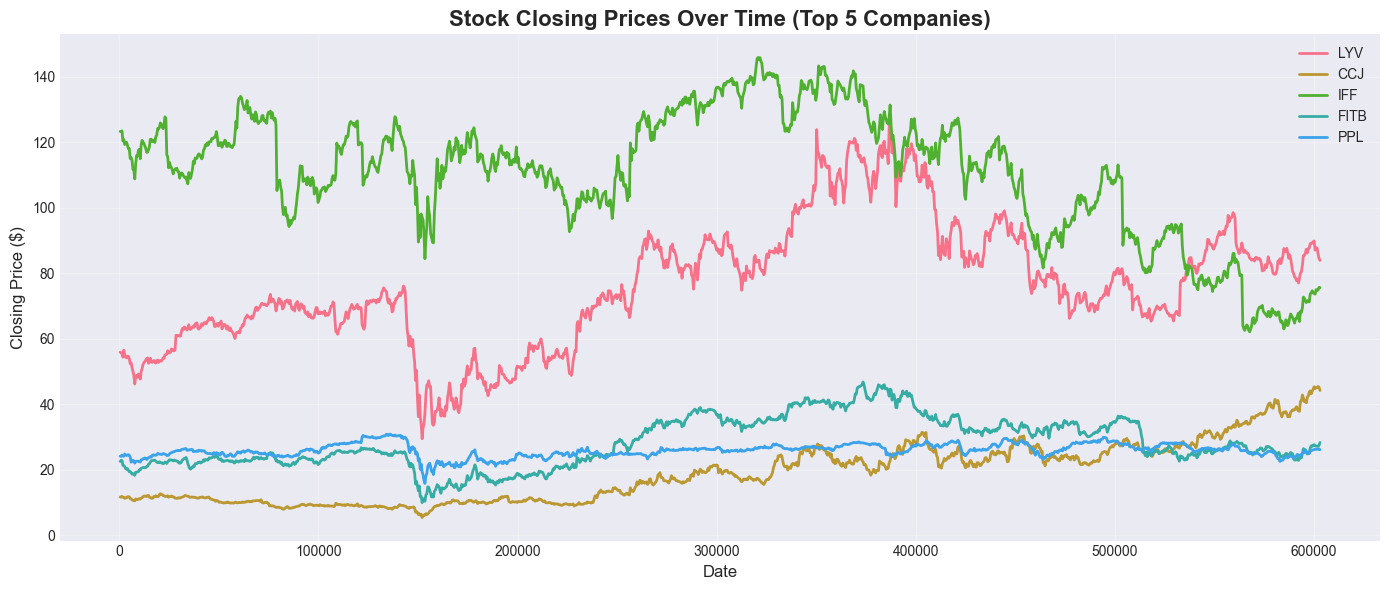

✓ Price trends plot completed

Overall Growth Comparison:
LYV: 50.04%
CCJ: 277.66%
IFF: -38.65%
FITB: 25.65%
PPL: 8.23%


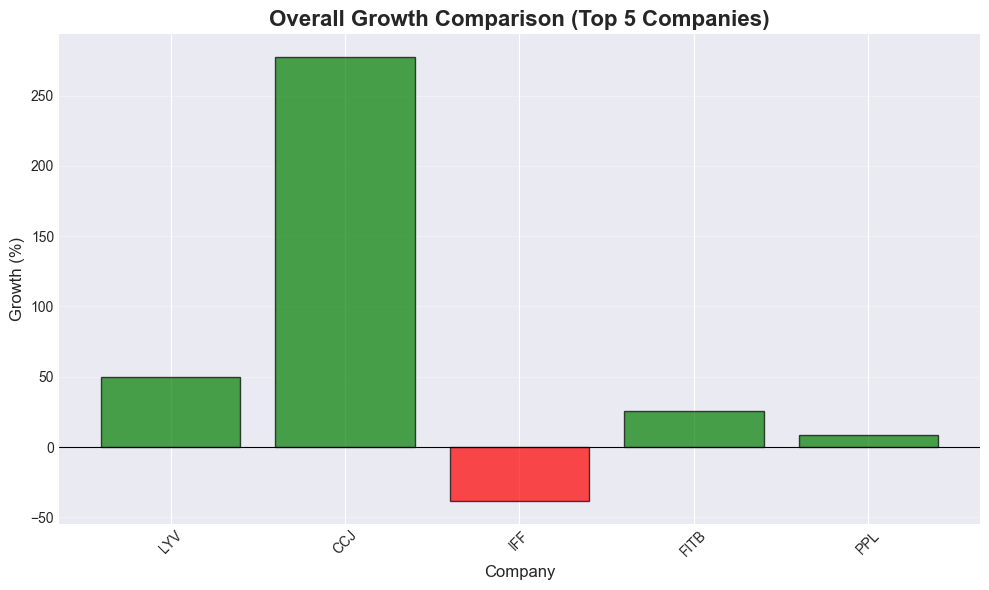

In [18]:
print("\n" + "=" * 50)
print("1. ANALYZING PRICE TRENDS")
print("=" * 50)

# a.Plot closing price for each company
plt.figure(figsize=(14, 6))
for company in top_companies:
    company_data = df_filtered[df_filtered['Company'] == company]
    plt.plot(company_data.index, company_data['Close'], label=company, linewidth=2)

plt.title('Stock Closing Prices Over Time (Top 5 Companies)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# b.Compare overall growth
print("\nOverall Growth Comparison:")
growth_comparison = {}
for company in top_companies:
    company_data = df_filtered[df_filtered['Company'] == company].sort_index()
    start_price = company_data['Close'].iloc[0]
    end_price = company_data['Close'].iloc[-1]
    growth_pct = ((end_price - start_price) / start_price) * 100
    growth_comparison[company] = growth_pct
    print(f"{company}: {growth_pct:.2f}%")

# c.Visualize growth comparison
plt.figure(figsize=(10, 6))
companies = list(growth_comparison.keys())
growth_values = list(growth_comparison.values())
colors = ['green' if x > 0 else 'red' for x in growth_values]
plt.bar(companies, growth_values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Overall Growth Comparison (Top 5 Companies)', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



2.Daily & Monthly returns:
a.calculating the daily returns for each company
b.plotting histograms of daily returns
c.calculating the monthly returns 
d. plotting the monthly returns


2. CALCULATING RETURNS
Calculating daily returns...

Daily Returns Statistics:
               LYV  CCJ  IFF  FITB  PPL
count  1257.000000  0.0  0.0   0.0  0.0
mean      0.074437  NaN  NaN   NaN  NaN
std       2.905034  NaN  NaN   NaN  NaN
min     -16.580624  NaN  NaN   NaN  NaN
25%      -1.164799  NaN  NaN   NaN  NaN
50%       0.016456  NaN  NaN   NaN  NaN
75%       1.302860  NaN  NaN   NaN  NaN
max      18.370159  NaN  NaN   NaN  NaN


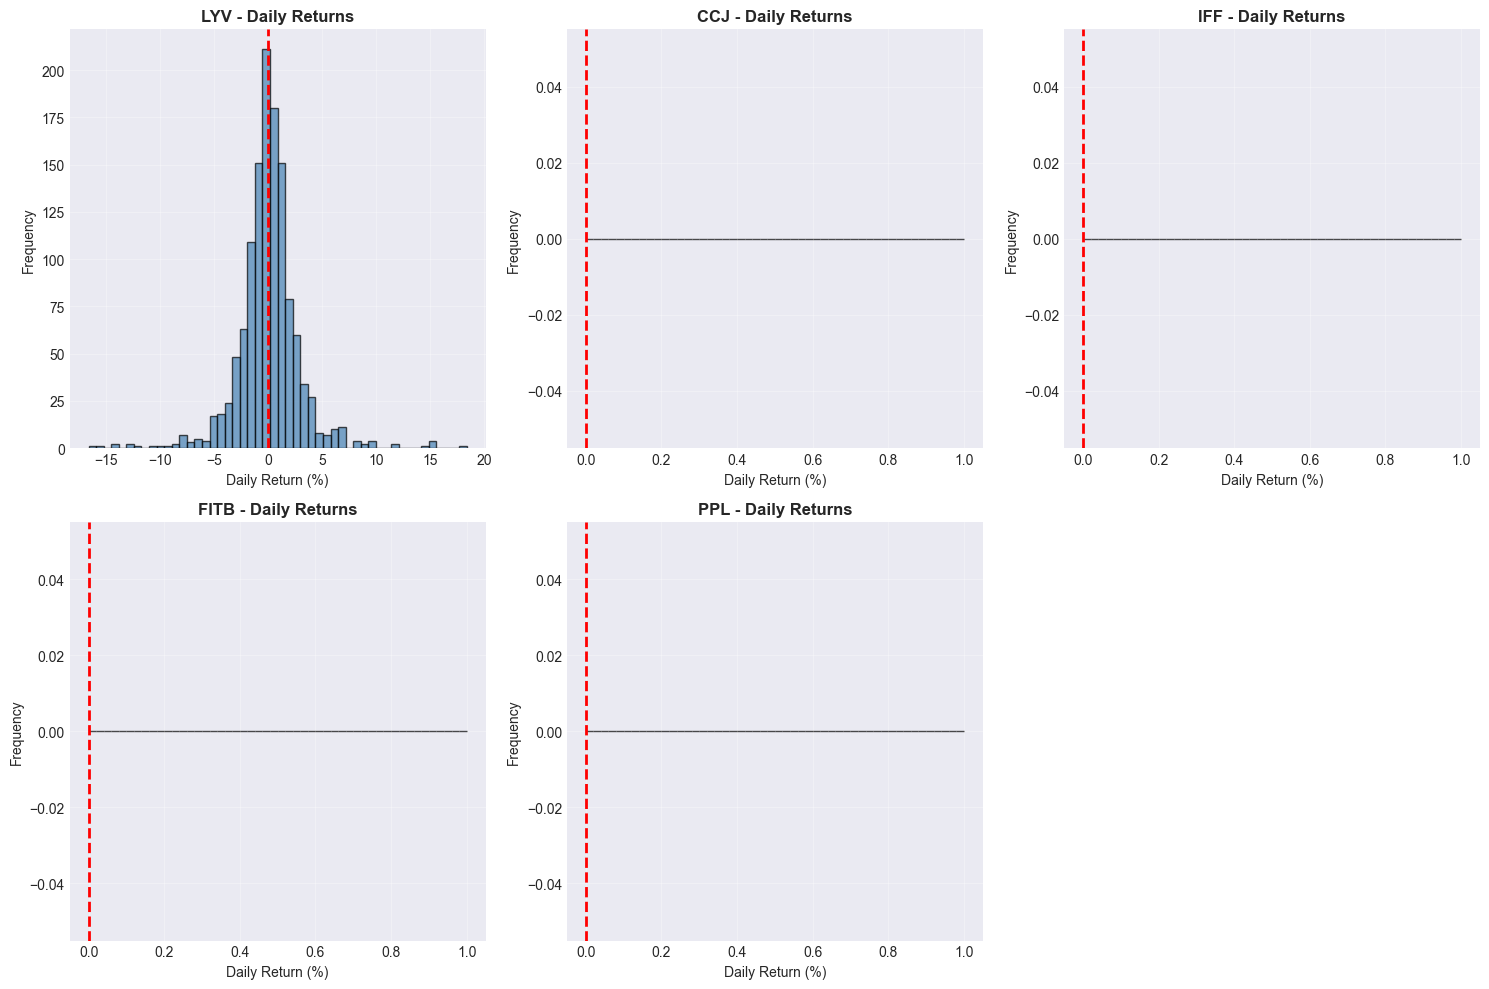


Calculating monthly returns...

Monthly Returns Statistics:
       LYV  CCJ  IFF  FITB  PPL
count  0.0  0.0  0.0   0.0  0.0
mean   NaN  NaN  NaN   NaN  NaN
std    NaN  NaN  NaN   NaN  NaN
min    NaN  NaN  NaN   NaN  NaN
25%    NaN  NaN  NaN   NaN  NaN
50%    NaN  NaN  NaN   NaN  NaN
75%    NaN  NaN  NaN   NaN  NaN
max    NaN  NaN  NaN   NaN  NaN


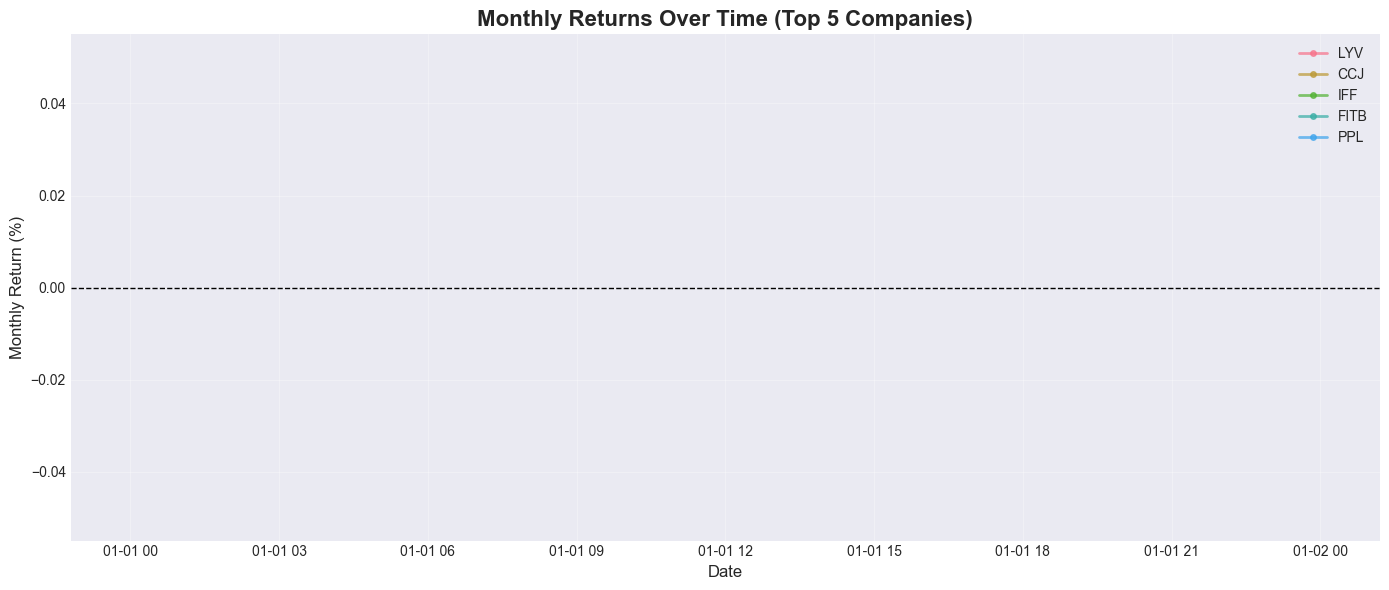

In [19]:
print("\n" + "=" * 50)
print("2. CALCULATING RETURNS")
print("=" * 50)

# a.Calculate daily returns for each company
print("Calculating daily returns")
daily_returns = pd.DataFrame()
for company in top_companies:
    company_data = df_filtered[df_filtered['Company'] == company].sort_index()
    daily_ret = company_data['Close'].pct_change() * 100
    daily_returns[company] = daily_ret

print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# b.Plot histograms of daily returns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, company in enumerate(top_companies):
    axes[idx].hist(daily_returns[company].dropna(), bins=50, alpha=0.7, 
                   edgecolor='black', color='steelblue')
    axes[idx].set_title(f'{company} - Daily Returns', fontweight='bold')
    axes[idx].set_xlabel('Daily Return (%)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[idx].grid(True, alpha=0.3)

# Hiding the 6th subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# c.Calculate monthly returns
print("\nCalculating monthly returns")
monthly_returns = pd.DataFrame()
for company in top_companies:
    company_data = df_filtered[df_filtered['Company'] == company].sort_index()
    # Ensure index is DatetimeIndex
    if not isinstance(company_data.index, pd.DatetimeIndex):
        company_data.index = pd.to_datetime(company_data.index)
    monthly_data = company_data['Close'].resample('M').last()
    monthly_ret = monthly_data.pct_change() * 100
    monthly_returns[company] = monthly_ret

print("\nMonthly Returns Statistics:")
print(monthly_returns.describe())

# d.Plot monthly returns
plt.figure(figsize=(14, 6))
for company in top_companies:
    plt.plot(monthly_returns.index, monthly_returns[company], 
             marker='o', label=company, linewidth=2, markersize=4, alpha=0.7)

plt.title('Monthly Returns Over Time (Top 5 Companies)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Return (%)', fontsize=12)
plt.legend(loc='best')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


3.Moving averages & volatility
a.calculating moving averages
b.calculating rolling volatility


3. MOVING AVERAGES & VOLATILITY
Calculating moving averages for LYV...
Calculating moving averages for CCJ...
Calculating moving averages for IFF...


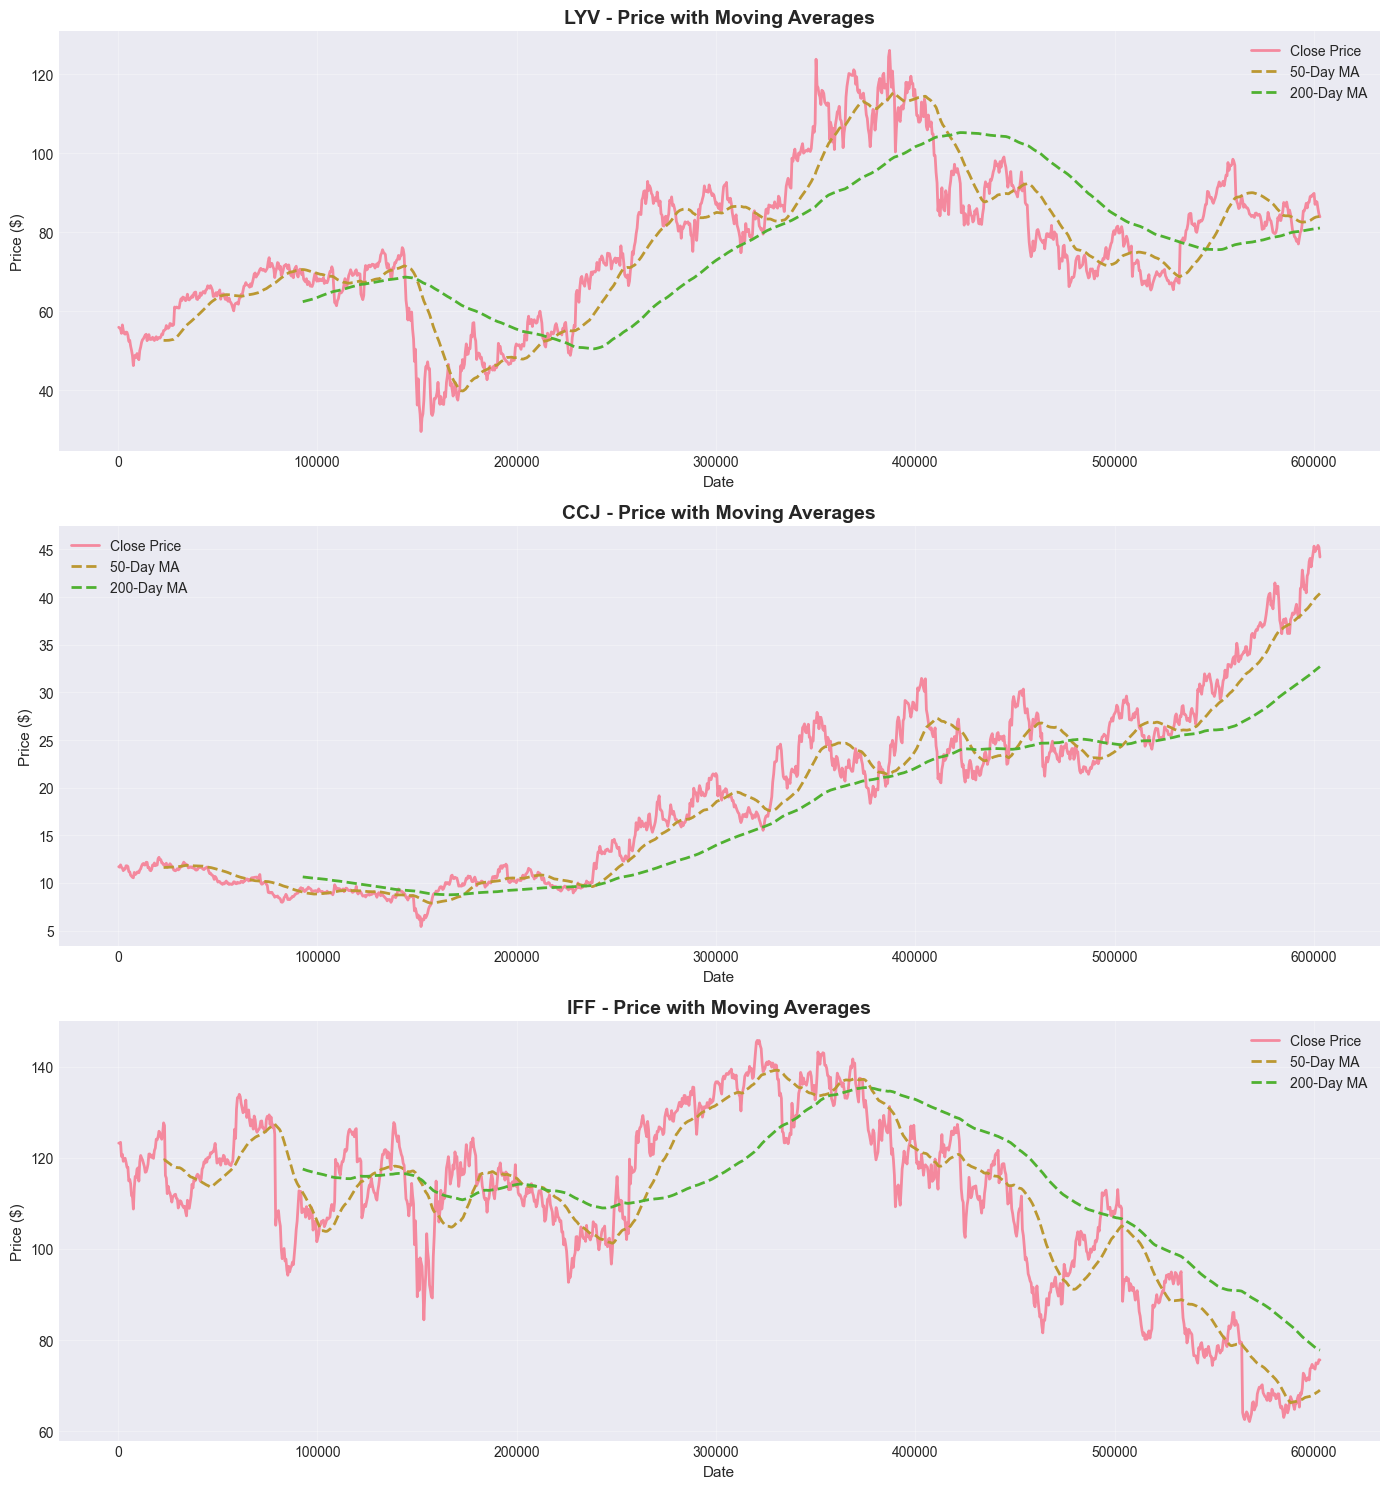


Calculating rolling volatility


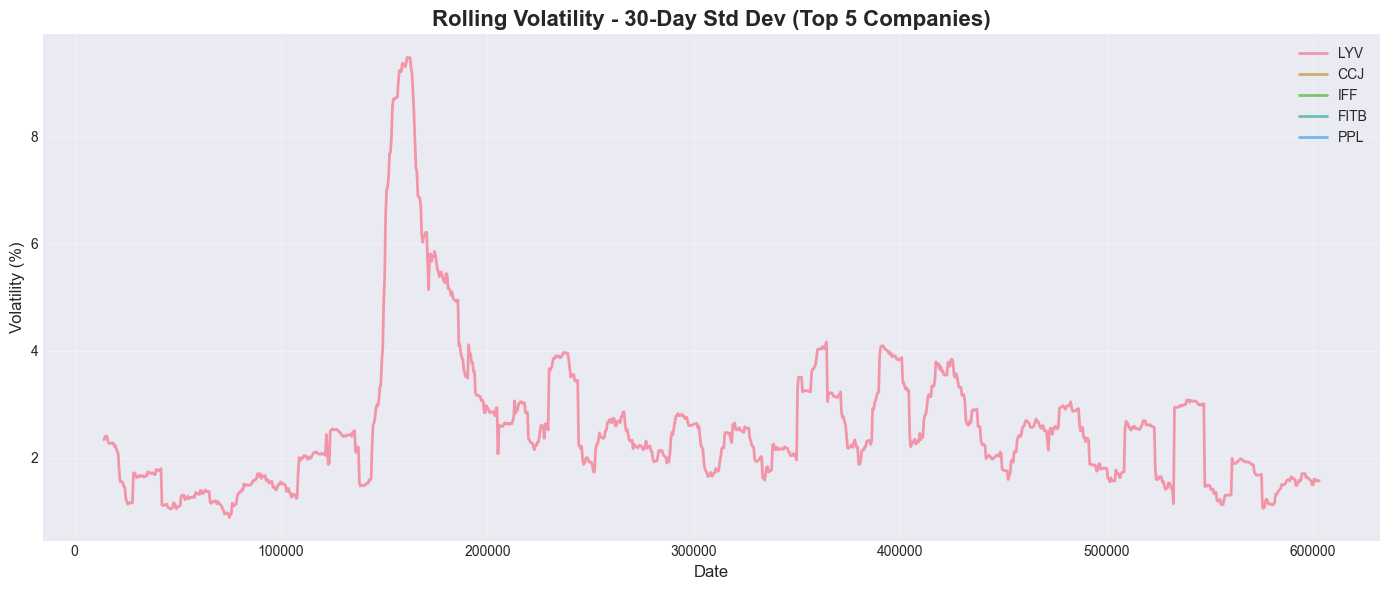

In [20]:
print("\n" + "=" * 50)
print("3. MOVING AVERAGES & VOLATILITY")
print("=" * 50)

# Calculating moving averages for top 3 companies only
companies_for_ma = top_companies[:3]
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

for idx, company in enumerate(companies_for_ma):
    print(f"Calculating moving averages for {company}...")
    company_data = df_filtered[df_filtered['Company'] == company].sort_index()
    
    # Calculating moving averages
    ma_50 = company_data['Close'].rolling(window=50).mean()
    ma_200 = company_data['Close'].rolling(window=200).mean()
    
    # Plot:
    axes[idx].plot(company_data.index, company_data['Close'], 
                   label='Close Price', linewidth=2, alpha=0.8)
    axes[idx].plot(company_data.index, ma_50, 
                   label='50-Day MA', linewidth=2, linestyle='--')
    axes[idx].plot(company_data.index, ma_200, 
                   label='200-Day MA', linewidth=2, linestyle='--')
    
    axes[idx].set_title(f'{company} - Price with Moving Averages', 
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=11)
    axes[idx].set_ylabel('Price ($)', fontsize=11)
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculating rolling volatility
print("\nCalculating rolling volatility")
volatility = pd.DataFrame()
for company in top_companies:
    company_data = df_filtered[df_filtered['Company'] == company].sort_index()
    daily_ret = company_data['Close'].pct_change() * 100
    rolling_std = daily_ret.rolling(window=30).std()
    volatility[company] = rolling_std

# Plot:
plt.figure(figsize=(14, 6))
for company in top_companies:
    plt.plot(volatility.index, volatility[company], label=company, linewidth=2, alpha=0.7)

plt.title('Rolling Volatility - 30-Day Std Dev (Top 5 Companies)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4.Corelation analysis
a.creating a corelation analysis
b.visualising with a heatmap


4. CORRELATION ANALYSIS
Calculating correlations

Correlation Matrix of Daily Returns:
      LYV  CCJ  IFF  FITB  PPL
LYV   1.0  NaN  NaN   NaN  NaN
CCJ   NaN  NaN  NaN   NaN  NaN
IFF   NaN  NaN  NaN   NaN  NaN
FITB  NaN  NaN  NaN   NaN  NaN
PPL   NaN  NaN  NaN   NaN  NaN


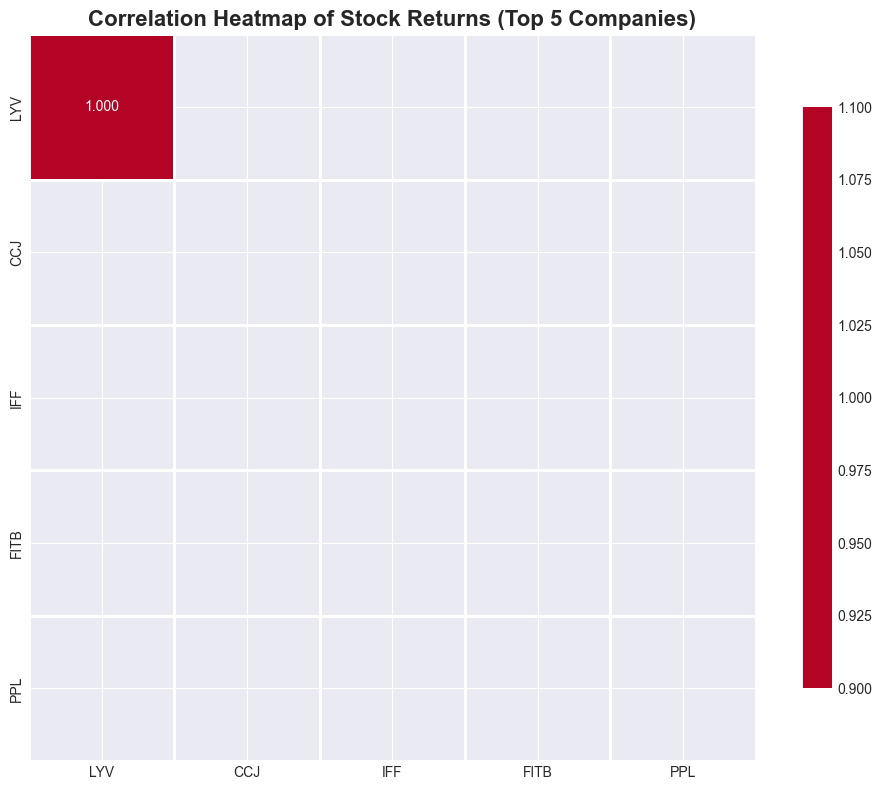

In [21]:
print("\n" + "=" * 50)
print("4. CORRELATION ANALYSIS")
print("=" * 50)

# Creating correlation matrix
print("Calculating correlations")
correlation_matrix = daily_returns.corr()
print("\nCorrelation Matrix of Daily Returns:")
print(correlation_matrix)

#heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Stock Returns (Top 5 Companies)', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


5.Additional Visulaizations:
a.boxplot to compare volatility between stocks


5. ADDITIONAL VISUALIZATIONS


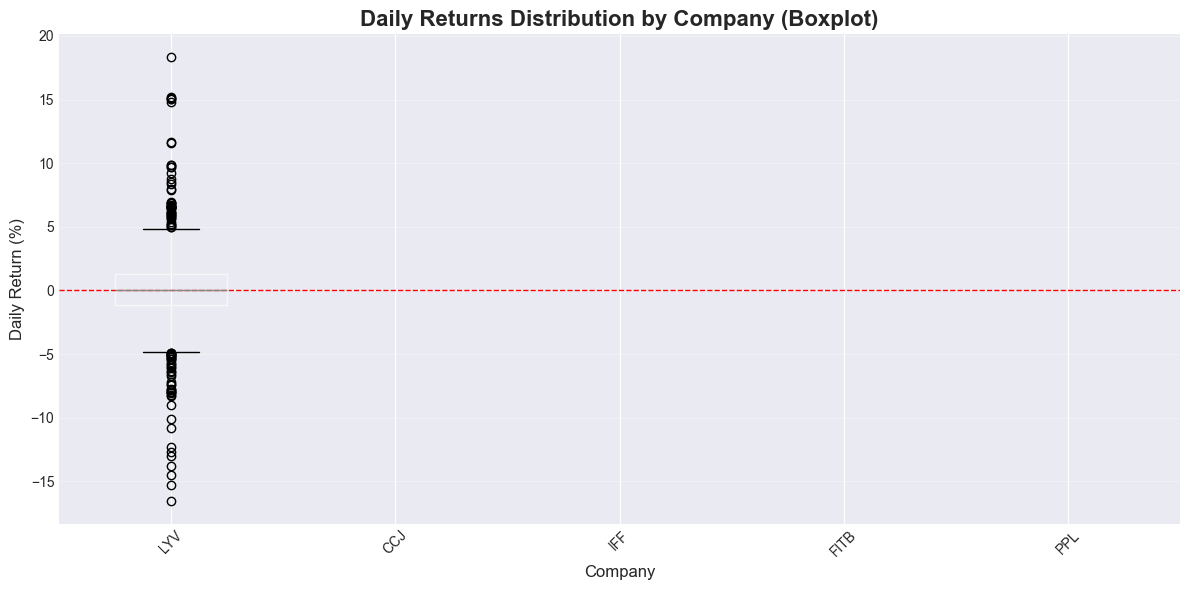

In [22]:
print("\n" + "=" * 50)
print("5. ADDITIONAL VISUALIZATIONS")
print("=" * 50)

# Boxplot - Compare volatility between stocks
plt.figure(figsize=(12, 6))
daily_returns.boxplot(figsize=(12, 6))
plt.title('Daily Returns Distribution by Company (Boxplot)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Statistics comparison:
a.volatility comparison 


Volatility Comparison (Standard Deviation of Daily Returns):
LYV     2.905034
CCJ          NaN
IFF          NaN
FITB         NaN
PPL          NaN
dtype: float64


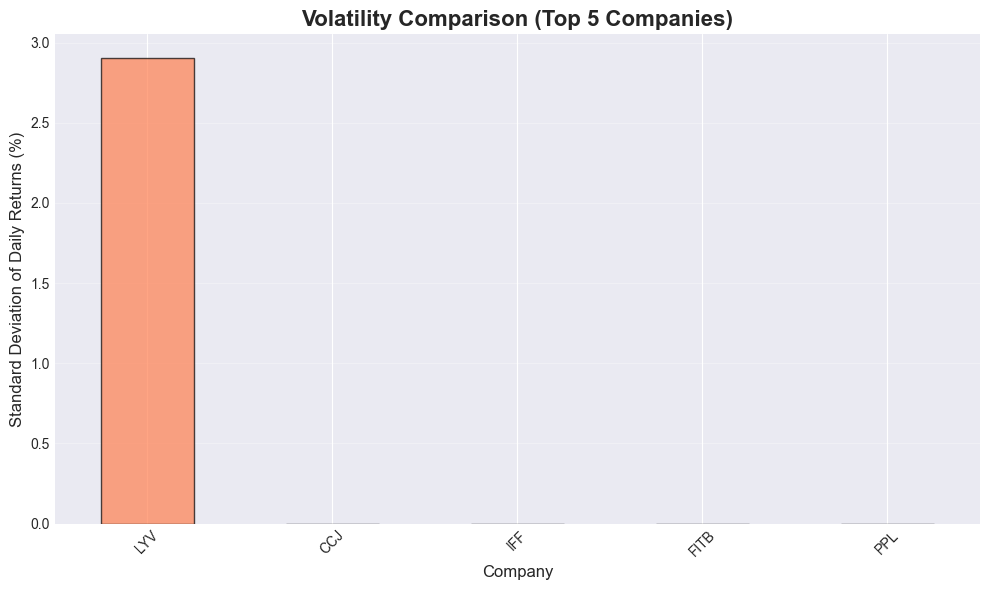


Note: Analysis performed on top 5 companies out of 491 total companies
Companies analyzed: ['LYV', 'CCJ', 'IFF', 'FITB', 'PPL']


In [23]:
# statistics comparison
print("\nVolatility Comparison (Standard Deviation of Daily Returns):")
volatility_summary = daily_returns.std().sort_values(ascending=False)
print(volatility_summary)

plt.figure(figsize=(10, 6))
volatility_summary.plot(kind='bar', color='coral', alpha=0.7, edgecolor='black')
plt.title('Volatility Comparison (Top 5 Companies)', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Standard Deviation of Daily Returns (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


print(f"\nNote: Analysis performed on top 5 companies out of {dataframe['Company'].nunique()} total companies")
print(f"Companies analyzed: {top_companies}")